# Sentiment Analysis - NLP and Deep Learning Models

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing scikit-learn modules
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing   import MinMaxScaler       # Data scaling
from sklearn.model_selection import train_test_split   # Train-test split
from sklearn.metrics         import r2_score, mean_squared_error, mean_absolute_error # Evaluation metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Model Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
df = pd.read_csv('Short_Amazon_Smartphones_Reviews_Cleaned_NLTK_ScoresFFs.csv')
#df = pd.read_csv('Amazon_Smartphones_Reviews_Cleaned_NLTK_Score.csv')


In [3]:
df.head(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiments,neg,neu,pos,compound,review_length
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,feel lucky found used phone u used hard phone ...,1.0,1,0.100,0.592,0.308,0.8966,223
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,nice phone nice grade pantach revue clean set ...,0.0,1,0.155,0.445,0.400,0.8548,149
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,pleased,0.0,1,0.000,0.000,1.000,0.4404,7
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,work good go slow sometimes good phone love,0.0,1,0.000,0.333,0.667,0.8750,43
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,great phone replace lost phone thing volume bu...,0.0,1,0.103,0.714,0.183,0.4215,119


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   10000 non-null  object 
 1   Brand Name     10000 non-null  object 
 2   Price          10000 non-null  float64
 3   Rating         10000 non-null  int64  
 4   Reviews        9974 non-null   object 
 5   Review Votes   10000 non-null  float64
 6   Sentiments     10000 non-null  int64  
 7   neg            10000 non-null  float64
 8   neu            10000 non-null  float64
 9   pos            10000 non-null  float64
 10  compound       10000 non-null  float64
 11  review_length  10000 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 937.6+ KB


In [5]:
# Drop null rows with null values
df    = df.dropna()

## Feature Extraction using TF-IDF


In [6]:
# Feature Extraction using TF-IDF
from scipy.sparse import csr_matrix

#X = vectorizer.fit_transform(df['Reviews']).toarray()
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['Reviews'])

# Convert X to CSR sparse matrix format
X = csr_matrix(X)

In [7]:
# Display the first 10 preprocessed reviews and their corresponding TF-IDF features
for index, row in df.head(10).iterrows():
    print(f"Review {index + 1} (Preprocessed): {row['Reviews']}")
    print(f"TF-IDF Features: {X[index]}\n")

Review 1 (Preprocessed): feel lucky found used phone u used hard phone line someone upgraded sold one son liked old one finally fell apart year didnt want upgrade thank seller really appreciate honesty said used phonei recommend seller highly would
TF-IDF Features:   (0, 989)	0.11940685421203538
  (0, 372)	0.1914534870682741
  (0, 702)	0.14918911936010104
  (0, 734)	0.15672003997329817
  (0, 691)	0.13823521451211562
  (0, 754)	0.28189654016567667
  (0, 873)	0.16521890194564107
  (0, 925)	0.1953571931266553
  (0, 951)	0.16110139149298938
  (0, 210)	0.1447689561135419
  (0, 993)	0.1640281685781857
  (0, 297)	0.20398090047518447
  (0, 574)	0.16333179858493574
  (0, 458)	0.22031333585463195
  (0, 810)	0.1834916835670472
  (0, 576)	0.22977644134137906
  (0, 804)	0.19563277830719042
  (0, 926)	0.23550209693433513
  (0, 807)	0.19733110057696118
  (0, 460)	0.20919228668047699
  (0, 357)	0.19023917058240145
  (0, 615)	0.1227115335580994
  (0, 933)	0.41009549710172766
  (0, 309)	0.17953596178344

## Logistic Regression and Multinomial Naive Bayes

In [8]:
# Splitting Data into Training and Testing Sets
y = df['Sentiments']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Model Training 

In [9]:
# Model Training
def train_model(X_train, y_train, model_type):
    if model_type == 'logistic_regression':
        model = LogisticRegression(max_iter=1000, random_state=42)
    elif model_type == 'multinomial_nb':
        model = MultinomialNB()
    else:
        raise ValueError("Invalid model type")
    model.fit(X_train, y_train)
    return model

# Train Logistic Regression Model
logistic_regression_model = train_model(X_train, y_train, model_type='logistic_regression')

# Train Multinomial Naive Bayes Model
multinomial_nb_model = train_model(X_train, y_train, model_type='multinomial_nb')

#### Model Evaluation and Pridiction

**Accuracy:** Accuracy tells us how correct our model's predictions are. It's the ratio of correctly predicted instances to the total instances. However, accuracy might not be ideal when dealing with imbalanced classes.

**Precision:** Precision focuses on accurate positive predictions. It's the ratio of true positive predictions to all positive predictions. High precision means reliable positive predictions.

**Recall (Sensitivity):** Recall measures the model's ability to correctly capture all positive instances. It's the ratio of true positive predictions to all actual positive instances.

**F1-Score:** F1-Score balances precision and recall. It provides a single metric that considers both aspects. It's useful when dealing with imbalanced classes.

In [10]:
# Model Prediction and Evaluation
def evaluate_model_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return RMSE, MSE, MAE,r2, accuracy, precision, recall, f1

In [11]:
# Evaluate Logistic Regression Model
logistic_regression_RMSE,logistic_regression_MSE,logistic_regression_MAE,logistic_regression_r2,logistic_regression_accuracy, logistic_regression_precision, logistic_regression_recall,logistic_regression_f1 = evaluate_model_predictions(logistic_regression_model, X_test, y_test)

# Evaluate Multinomial Naive Bayes Model
multinomial_nb_RMSE,multinomial_nb_MSE,multinomial_nb_MAE,multinomial_nb_r2,multinomial_nb_accuracy, multinomial_nb_precision, multinomial_nb_recall, multinomial_nb_f1 = evaluate_model_predictions(multinomial_nb_model, X_test, y_test)

In [12]:
# Display Evaluation Metrics for Logistic Regression Model
print("Logistic Regression Model Evaluation:\n")
print(f"Accuracy : {logistic_regression_accuracy:.4f}")
print(f"Precision: {logistic_regression_precision:.4f}")
print(f"Recall   : {logistic_regression_recall:.4f}")
print(f"F1-Score : {logistic_regression_f1:.4f}")

# Print the calculated performance metrics
print(f"RMSE      : {logistic_regression_RMSE:.4f}")
print(f"MSE       : {logistic_regression_MSE:.4f}")
print(f"MAE       : {logistic_regression_MAE:.4f}")
print(f"R-squared : {logistic_regression_r2:.4f}")

Logistic Regression Model Evaluation:

Accuracy : 0.9053
Precision: 0.9229
Recall   : 0.9457
F1-Score : 0.9341
RMSE      : 0.3078
MSE       : 0.0947
MAE       : 0.0947
R-squared : 0.5396


In [13]:
# Display Evaluation Metrics for Multinomial Naive Bayes Model
print("\nMultinomial Naive Bayes Model Evaluation:\n")
print(f"Accuracy : {multinomial_nb_accuracy:.4f}")
print(f"Precision: {multinomial_nb_precision:.4f}")
print(f"Recall   : {multinomial_nb_recall:.4f}")
print(f"F1-Score : {multinomial_nb_f1:.4f}")

# Print the calculated performance metrics
print(f"RMSE     : {multinomial_nb_RMSE:.4f}")
print(f"MSE      : {multinomial_nb_MSE:.4f}")
print(f"MAE       : {multinomial_nb_MAE:.4f}")
print(f"R-squared : {multinomial_nb_r2:.4f}")


Multinomial Naive Bayes Model Evaluation:

Accuracy : 0.8145
Precision: 0.8175
Recall   : 0.9513
F1-Score : 0.8793
RMSE     : 0.4307
MSE      : 0.1855
MAE       : 0.1855
R-squared : 0.0987


In [14]:
Accuracy_lr = logistic_regression_accuracy
Accuracy_nb = multinomial_nb_accuracy 

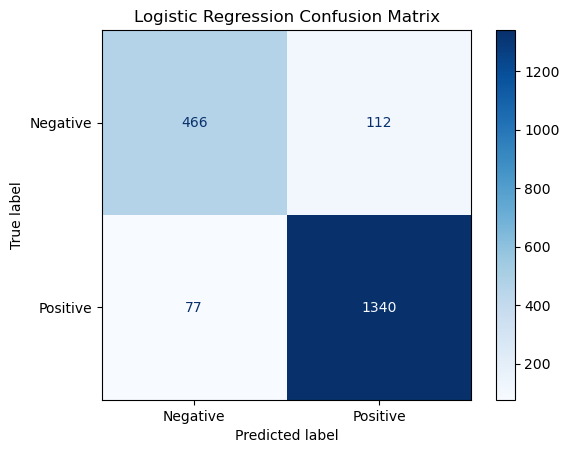

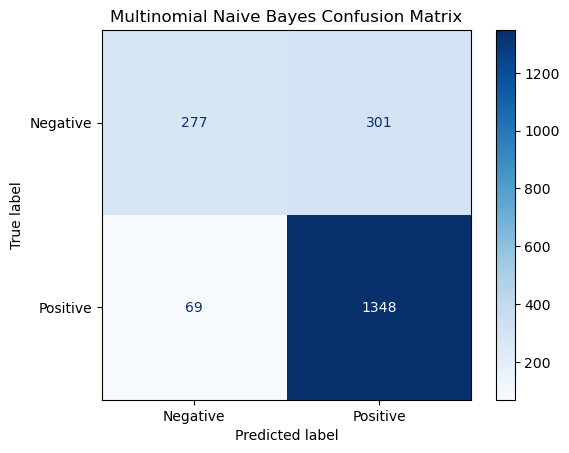

In [15]:
# Plot Confusion Matrix
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
    disp.plot(cmap=plt.cm.Blues, values_format='d', ax=None)
    plt.title(title)
    plt.show()

# Plot Confusion Matrix for Logistic Regression Model
plot_confusion_matrix(logistic_regression_model, X_test, y_test, title='Logistic Regression Confusion Matrix')

# Plot Confusion Matrix for Multinomial Naive Bayes Model
plot_confusion_matrix(multinomial_nb_model, X_test, y_test, title='Multinomial Naive Bayes Confusion Matrix')

## DEEP LEARNING MODELS

#### Data Preprocessing for Deep Learning

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [17]:
# Convert dataframe reviews to a list of strings
X_text = df['Reviews'].tolist()
X_text[0]

'feel lucky found used phone u used hard phone line someone upgraded sold one son liked old one finally fell apart year didnt want upgrade thank seller really appreciate honesty said used phonei recommend seller highly would'

In [18]:
# Tokenize the text data
max_words = 10000  # Maximum number of words to tokenize
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_text)
tokenizer

In [19]:
# Convert text data to sequences
X_sequences = tokenizer.texts_to_sequences(X_text)


In [20]:
# Pad sequences to ensure uniform length
max_sequence_length = 100  # Maximum length of sequences
X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
X_padded

array([[ 174, 1304,  180, ...,    0,    0,    0],
       [  50,    2,   50, ...,    0,    0,    0],
       [ 221,    0,    0, ...,    0,    0,    0],
       ...,
       [   2,   93,    2, ...,    0,    0,    0],
       [   1,   99,   33, ...,    0,    0,    0],
       [   2,   63,    3, ...,    0,    0,    0]])

In [21]:
# y (labels) for positive and negative sentiment
y = df['Sentiments']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

## LSTM

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, BatchNormalization, GRU


In [23]:
# Define LSTM model
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=128))  # Embedding layer with input dimension 1000 and output dimension 128
model.add(LSTM(128))  # LSTM layer with 128 units
model.add(BatchNormalization())  # Batch normalization layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))
model.summary()

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.6702 - loss: 0.6342 - val_accuracy: 0.7103 - val_loss: 0.6020
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.7167 - loss: 0.5894 - val_accuracy: 0.3098 - val_loss: 0.9753
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.7158 - loss: 0.5889 - val_accuracy: 0.2952 - val_loss: 2.9901
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.7114 - loss: 0.5955 - val_accuracy: 0.7123 - val_loss: 0.7982
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.8178 - loss: 0.4073 - val_accuracy: 0.8722 - val_loss: 0.3320


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │       128,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 780,165 (2.98 MB)

 Trainable params: 259,969 (1015.50 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 519,940 (1.98 MB)

In [25]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("LSTM Test Loss:", loss)
print("LSTM Test Accuracy:", accuracy)

Accuracy_lstm = accuracy

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8812 - loss: 0.3091
LSTM Test Loss: 0.3320081830024719
LSTM Test Accuracy: 0.8721804618835449


## Bidirectional LSTM

In [26]:
# Define LSTM model
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=128))  # Embedding layer with input dimension 1000 and output dimension 128
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model.add(BatchNormalization())  # Batch normalization layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))
model.summary()

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.7755 - loss: 0.4483 - val_accuracy: 0.7103 - val_loss: 0.6121
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 108ms/step - accuracy: 0.9125 - loss: 0.2374 - val_accuracy: 0.9023 - val_loss: 0.2587
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 112ms/step - accuracy: 0.9334 - loss: 0.1863 - val_accuracy: 0.9153 - val_loss: 0.2522
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 29s 117ms/step - accuracy: 0.9425 - loss: 0.1612 - val_accuracy: 0.9118 - val_loss: 0.2580
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - accuracy: 0.9583 - loss: 0.1173 - val_accuracy: 0.9098 - val_loss: 0.2647


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 128)       │       128,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 256)            │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,359,045 (9.00 MB)

 Trainable params: 786,177 (3.00 MB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 1,572,356 (6.00 MB)

In [28]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Bidirectional LSTM Test Loss:", loss)
print("Bidirectional LSTM Test Accuracy:", accuracy)
Accuracy_Bi_lstm  =accuracy


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9157 - loss: 0.2592
Bidirectional LSTM Test Loss: 0.26470184326171875
Bidirectional LSTM Test Accuracy: 0.9097744226455688


## GRU - Bidirectional

In [29]:
# Define GRU model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model.add(Bidirectional(GRU(64)))  # Using Bidirectional GRU for better context understanding
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
# Train the model
epochs_hist = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))
model.summary()

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - accuracy: 0.7287 - loss: 0.5354 - val_accuracy: 0.8997 - val_loss: 0.2745
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.9194 - loss: 0.2231 - val_accuracy: 0.9053 - val_loss: 0.2552
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.9565 - loss: 0.1308 - val_accuracy: 0.9213 - val_loss: 0.2354
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.9716 - loss: 0.0937 - val_accuracy: 0.9253 - val_loss: 0.2380
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9796 - loss: 0.0743 - val_accuracy: 0.9253 - val_loss: 0.2767


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,063,877 (15.50 MB)

 Trainable params: 1,354,625 (5.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,709,252 (10.33 MB)

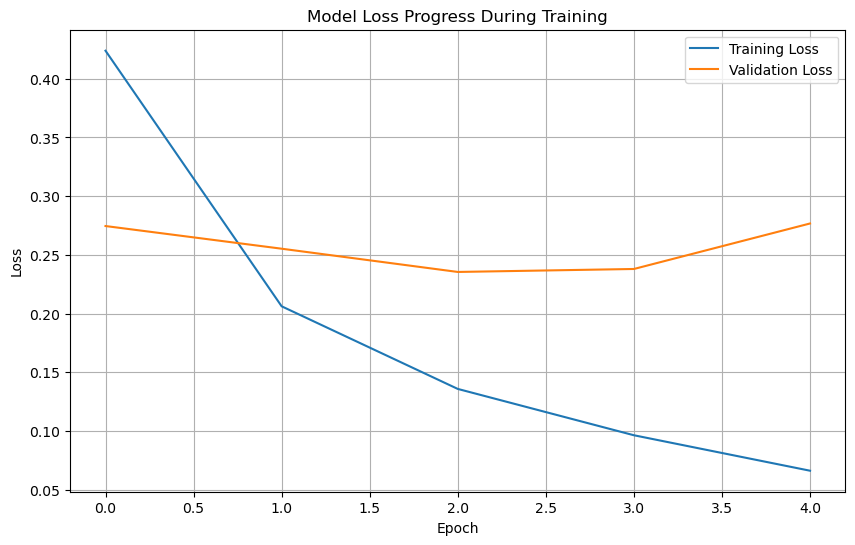

In [31]:
# Plot the training and validation loss progress over epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs_hist.history['loss'], label='Training Loss')
plt.plot(epochs_hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.grid(True)
plt.show()

In [32]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
Accuracy_gru = accuracy

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9273 - loss: 0.2706
Test Loss: 0.27673184871673584
Test Accuracy: 0.9253132939338684


### Comparision of NLP and Deep Learning Models 

In [33]:
print("\n")
print(f"Mn Naive Bayes Accuracy:            {Accuracy_lr:.4f}")
print(f"Logistic Regression Accuracy:       {Accuracy_nb:.4f}")
print(f"RNN - LSTM Accuracy:                {Accuracy_lstm:.4f}")
print(f"RNN - Bi-directional LSTM Accuracy: {Accuracy_Bi_lstm:.4f}")
print(f"GRN - Bidirectional Accuracy:       {Accuracy_gru:.4f}")
print("\n")




Mn Naive Bayes Accuracy:            0.9053
Logistic Regression Accuracy:       0.8145
RNN - LSTM Accuracy:                0.8722
RNN - Bi-directional LSTM Accuracy: 0.9098
GRN - Bidirectional Accuracy:       0.9253




## Hyperparameter Tuning:
### Gated - RNN (GRU Bidirectional)

In [34]:
from tensorflow import keras
import kerastuner as kt

In [35]:
def model_builder(hp):
  '''
  Args:
    hp - Keras tuner object
  '''
  # Initialize the Sequential API and start stacking the layers
  model = keras.Sequential()
  model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=64, step=4)
  #model.add(keras.layers.Dense(units=hp_units, activation='relu', name='dense_1'))
  model.add(keras.layers.Bidirectional(GRU(units=hp_units, name='GRU-BiDirect')))
  # Add next layers
  model.add(Dropout(0.5))  # Dropout layer for regularization
  model.add(Dense(1, activation='sigmoid'))
  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.binary_crossentropy,
                metrics=['accuracy'])
  return model

In [36]:
# Instantiate the tuner
tuner = kt.Hyperband(   model_builder, 
                        objective='val_accuracy', # 
                        max_epochs=10,
                        factor=3, # factor which you have seen above 
                        directory='dir', # directory to save logs 
                        project_name='Sentiment')
# hypertuning settings
tuner.search_space_summary() 

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 4, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [37]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [38]:
# Perform hypertuning
tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early])
best_hp=tuner.get_best_hyperparameters()[0]

Trial 30 Complete [00h 00m 48s]
val_accuracy: 0.9003759622573853

Best val_accuracy So Far: 0.9104009866714478
Total elapsed time: 00h 14m 23s
